# Дипломное задание по профессии
# «Data Scientist»

### это 1 из 3 файлов дипломного задания

## Тема:
«Формирование стратегии крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление рекомендаций стейкхолдерам, построение предиктивной модели)».

## Цель задания:

– Собрать все полученные на курсе знания воедино.

– Закрепить умение исследовать данные, проверять гипотезу, делать выводы и презентовать результаты.

– Закрепить умение исследовать внешние факторы, строить модель, получать прогноз и делать выводы.

## Введение:
Поздравляем! Вы попали на стажировку в одно из подразделений группы компаний, Вы — аналитик крупного агрегатора такси. Теперь перед вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке. Успехов!

## Задания:
# 1. Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme (style = 'darkgrid')

## Основной датасет содержит информацию о заказах такси одного из известных агрегаторов:

order_gk — идентификатор поездки;

weekday_key — день недели совершения поездки;

hour_key — час совершения поездки;

distance_km — дистанция поездки;

offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);

driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

In [2]:
# !wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/51885/dip_hw_x_taxi.csv' -O dip_hw_x_taxi.csv

In [3]:
df = pd.read_csv('dip_hw_x_taxi.csv')
df

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1
...,...,...,...,...,...,...
1995,918581,5,16,8.591,Delivery,1
1996,918656,7,14,30.835,Comfort,1
1997,918683,4,19,20.365,Delivery,0
1998,918737,2,23,14.960,Economy,0


In [4]:
# Посмотреть пропуски

def prop(data = df, p = 1):

    pr = pd.DataFrame([])
    col = []
    pp = []
    pc = []
    tp = []

    for c in data:
        col.append(c)
        pp.append(data[c].isna().sum())
        pc.append(round(100 * data[c].isna().sum() / len(data), 2))
        tp.append(data.dtypes[c])

    pr[f'Entries: {len(data)}'] = col
    pr['SUM_Null'] = pp
    pr['%_Null'] = pc
    pr['Dtype'] = tp

    if p == 0:
        return pr

    return pr[pr['SUM_Null'] != 0]

In [5]:
prop(df, 0)

,Entries: 2000,SUM_Null,%_Null,Dtype
0,order_gk,0,0.0,int64
1,weekday_key,0,0.0,int64
2,hour_key,0,0.0,int64
3,distance_km,0,0.0,float64
4,offer_class_group,0,0.0,object
5,driver_response,0,0.0,int64


---

Как мы видим, пропусков нет.

Так же посмотрим какие уникальные значения содержаться в каждой колонке.

---

In [42]:
# Посмотреть информацию по всем значениям

def data(data = df):

    print('-------------------------------------\nКоличество данных -', len(data))
    print('-------------------------------------\nКоличество дубликатов -', data.duplicated().sum())

    for d in data:
        print('\n-------------------------------------\n', 'Столбец -', d, '||', 
              'Кол-во уникальных значений -', len(data[d].unique()), '||',  
              'Кол-во дубликатов -', data[d].duplicated().sum())
        print('\nУникальные значения:')
        print(np.sort(data[d].unique()))

In [43]:
data(df)

-------------------------------------
Количество данных - 2000
-------------------------------------
Количество дубликатов - 0

-------------------------------------
 Столбец - order_gk || Кол-во уникальных значений - 1985 || Кол-во дубликатов - 15

Уникальные значения:
[   412    436   1327 ... 918683 918737 919196]

-------------------------------------
 Столбец - weekday_key || Кол-во уникальных значений - 7 || Кол-во дубликатов - 1993

Уникальные значения:
[1 2 3 4 5 6 7]

-------------------------------------
 Столбец - hour_key || Кол-во уникальных значений - 24 || Кол-во дубликатов - 1976

Уникальные значения:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

-------------------------------------
 Столбец - distance_km || Кол-во уникальных значений - 1969 || Кол-во дубликатов - 31

Уникальные значения:
[2.40000e-02 5.20000e-02 6.40000e-02 ... 1.14389e+02 1.27045e+02
 1.38950e+02]

-------------------------------------
 Столбец - offer_class_group || Кол-

---

Данный датасет не имеет пропусков и дубликатов.

Все поездки поделены на 4 класса - 'Comfort' 'Delivery' 'Economy' 'Premium'

Также имеется разделение по дню недели совершения поездки, часу совершения поездки и статусу поездки (поездка совершена либо отменена).

Каждая поездка имеет информацию о ее длине в километрах.

---

# 2. Рассчитайте основные описательные статистики
(среднее, минимум, 25-50-75-персентили, максимум)


In [7]:
df.describe().round(2)

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,462807.38,4.04,11.61,26.28,0.59
std,270556.21,2.01,6.92,18.88,0.49
min,412.00,1.00,0.00,0.02,0.00
25%,227126.50,2.00,6.00,12.18,0.00
50%,458637.00,4.00,12.00,22.83,1.00
75%,709420.25,6.00,18.00,36.43,1.00
max,919196.00,7.00,23.00,138.95,1.00


---

Из основных статистик, показанных выше, более всего полезны данные по длине поездок.

Средняя длина поездки составляет: 26.28

50 перцентиль: 22.83

Максимальная длина поездки: 138.95

Минимальная длина поездки составляет всего 20 метров – скорее всего данный датасет содержит выбросы или какие-то ошибочные данные, посмотрим на них ниже.

Большинство поездок совершалось на расстояние от 12 до 37 км, это данные представленные для всех классов поездок, по отдельности классы будем рассматривать ниже.

---

# 3. Вычислите количество значений по классам такси

In [8]:
df.groupby('offer_class_group').agg({'distance_km': ['describe']}).reset_index().round(2)

offer_class_group distance_km                                           \
                       describe                                            
                          count   mean    std   min    25%    50%    75%   
0           Comfort       500.0  29.76  17.64  0.02  16.35  28.08  41.30   
1          Delivery       500.0  17.89  11.10  0.06   9.09  16.61  25.69   
2           Economy       500.0  26.28  17.02  0.09  13.37  23.80  36.85   
3           Premium       500.0  31.17  24.43  0.05  11.44  26.26  45.92   

           
           
      max  
0   81.51  
1   55.24  
2   90.52  
3  138.95

---

Каждый класс содержит равное кол-во поездок - 500.

Сразу из сводной таблице мы можем увидеть, что доставку заказывают на более короткие расстояния, а премиум класс имеет самые длинные поездки.
Классы эконом и комфорт более схожи между собой, для более детального их разбора необходимо смотреть распределение всех поездок.

Теперь посмотрим распределение по дням недели, по времени заказа и по состоявшемся поездкам.

---

In [9]:
# Посмотреть распределение

def val_count (data = df, col = 'col'):
    tab = pd.DataFrame()
    tab[col] = data[col].value_counts().sort_index().index
    tab['count'] = data[col].value_counts().sort_index().values
    tab['%'] = (data[col].value_counts().sort_index().values / len(df) * 100).round(2)

    return tab

In [10]:
val_count(df, 'weekday_key')

,weekday_key,count,%
0,1,277,13.85
1,2,284,14.20
2,3,276,13.80
3,4,294,14.70
4,5,276,13.80
5,6,292,14.60
6,7,301,15.05


---

Распределение по дням недели не показало каких то дней с наибольшей загруженностью.

---

In [11]:
val_count(df, 'hour_key')

,hour_key,count,%
0,0,75,3.75
1,1,85,4.25
2,2,74,3.70
3,3,84,4.20
4,4,93,4.65
5,5,80,4.00
6,6,76,3.80
7,7,94,4.70
8,8,95,4.75
9,9,73,3.65


---

Распределение по часам также не имеет каких либо часовых интервалов, где наблюдается пик заказов, хотя небольшой рост спроса имеется в 13 и 16 часов.

---

In [12]:
val_count(df, 'driver_response')

,driver_response,count,%
0,0,826,41.3
1,1,1174,58.7


---

Из распределения совершенных заказов мы видим, что очень большой процент поездок (41,3 %) не был совершен.

---

# 4. Визуализируйте распределение дистанций поездок

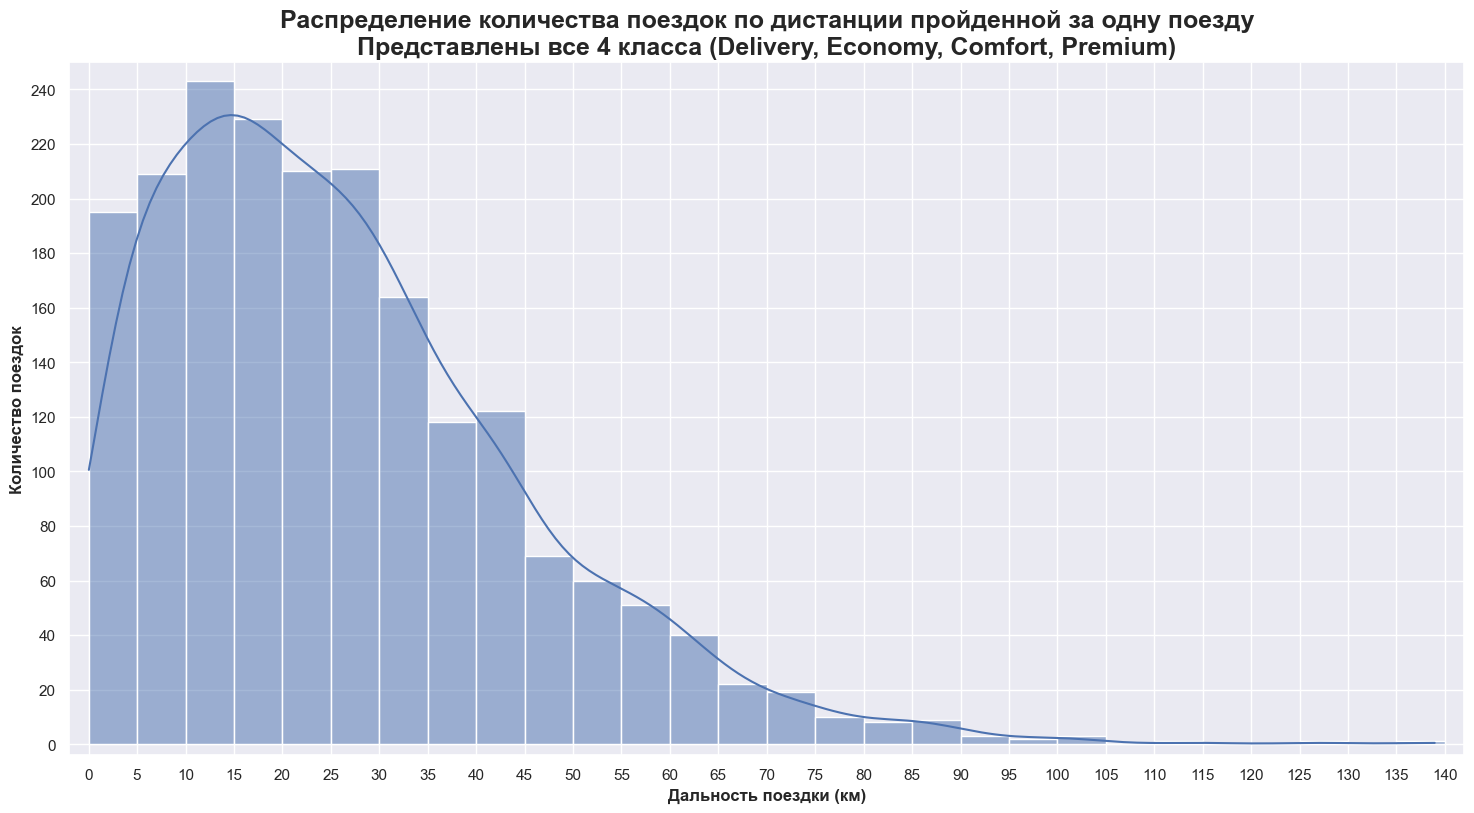

In [13]:
plt.figure(figsize=[18, 9])
plt.title('Распределение количества поездок по дистанции пройденной за одну поезду\nПредставлены все 4 класса (Delivery, Economy, Comfort, Premium)', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
plt.ylabel('Количество поездок', fontweight = 'bold')
sns.histplot(data = df, x = 'distance_km', kde=True, binwidth = 5, binrange = [0, 140])
plt.xlim(-2, 142)
plt.ylim(-4, 250)
plt.xticks(range(0, 141, 5))
plt.yticks(range(0, 241, 20))
plt.show()

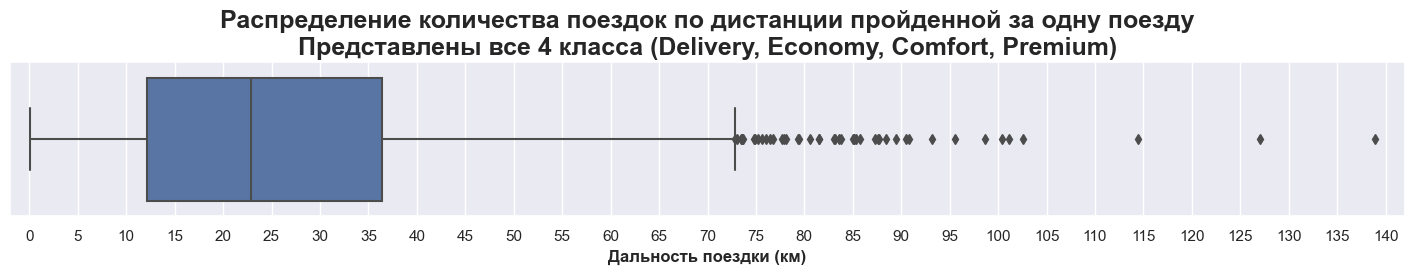

In [14]:
plt.figure(figsize=[18, 2])
sns.boxplot(data = df, x = 'distance_km')
plt.title('Распределение количества поездок по дистанции пройденной за одну поезду\nПредставлены все 4 класса (Delivery, Economy, Comfort, Premium)', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
plt.xlim(-2, 142)
plt.xticks(range(0, 141, 5))
plt.show()

# 5. Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

  0%|          | 0/4 [00:00<?, ?it/s]

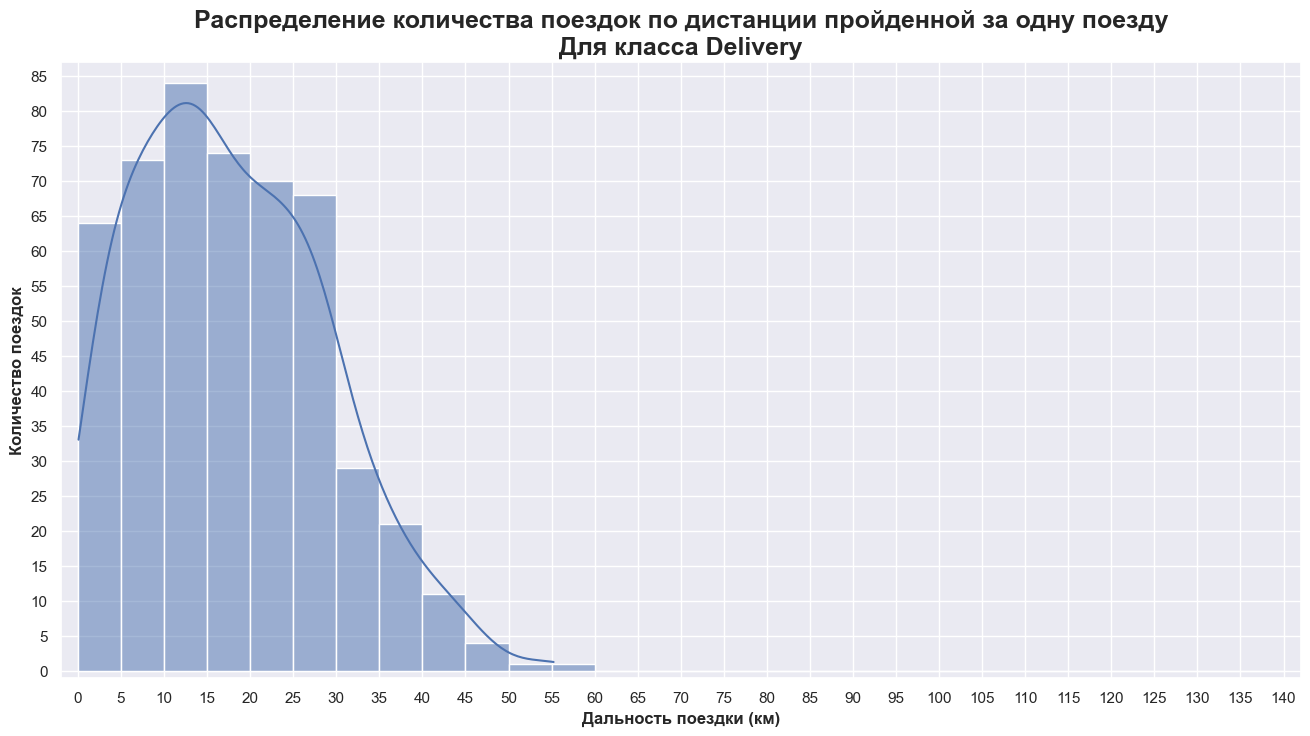

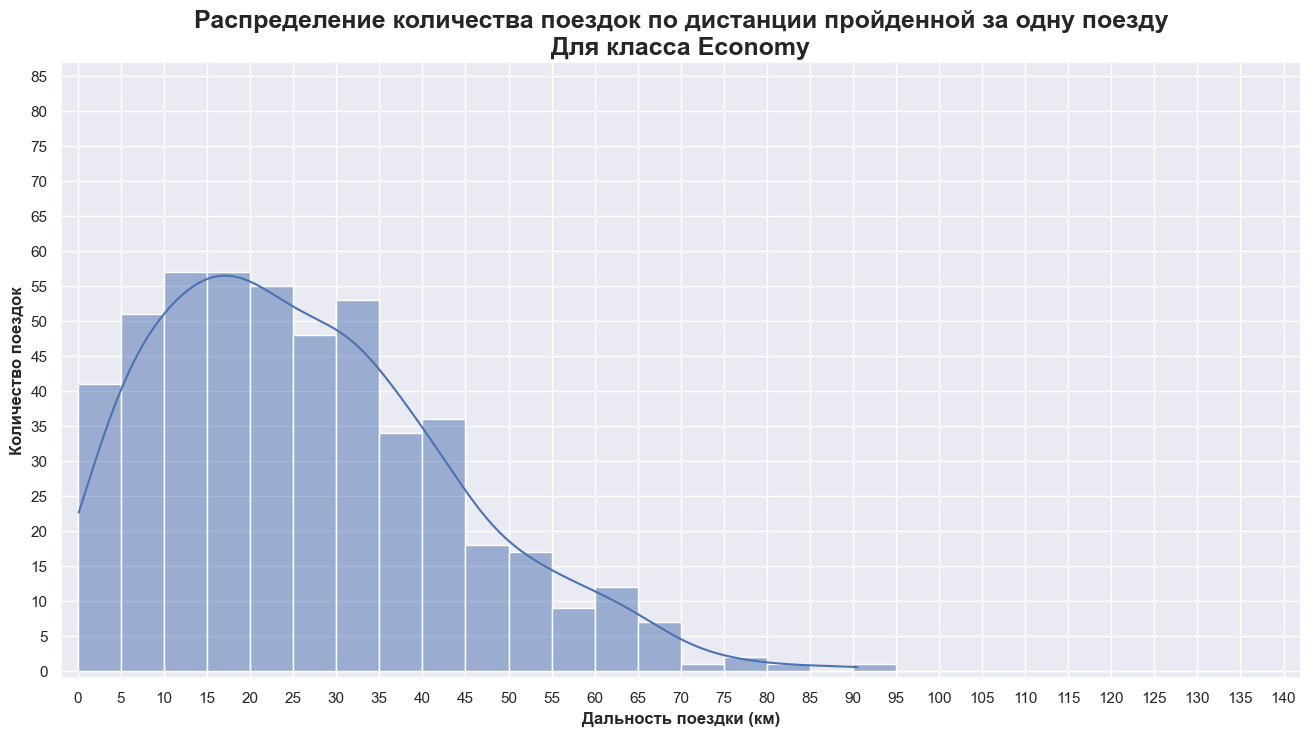

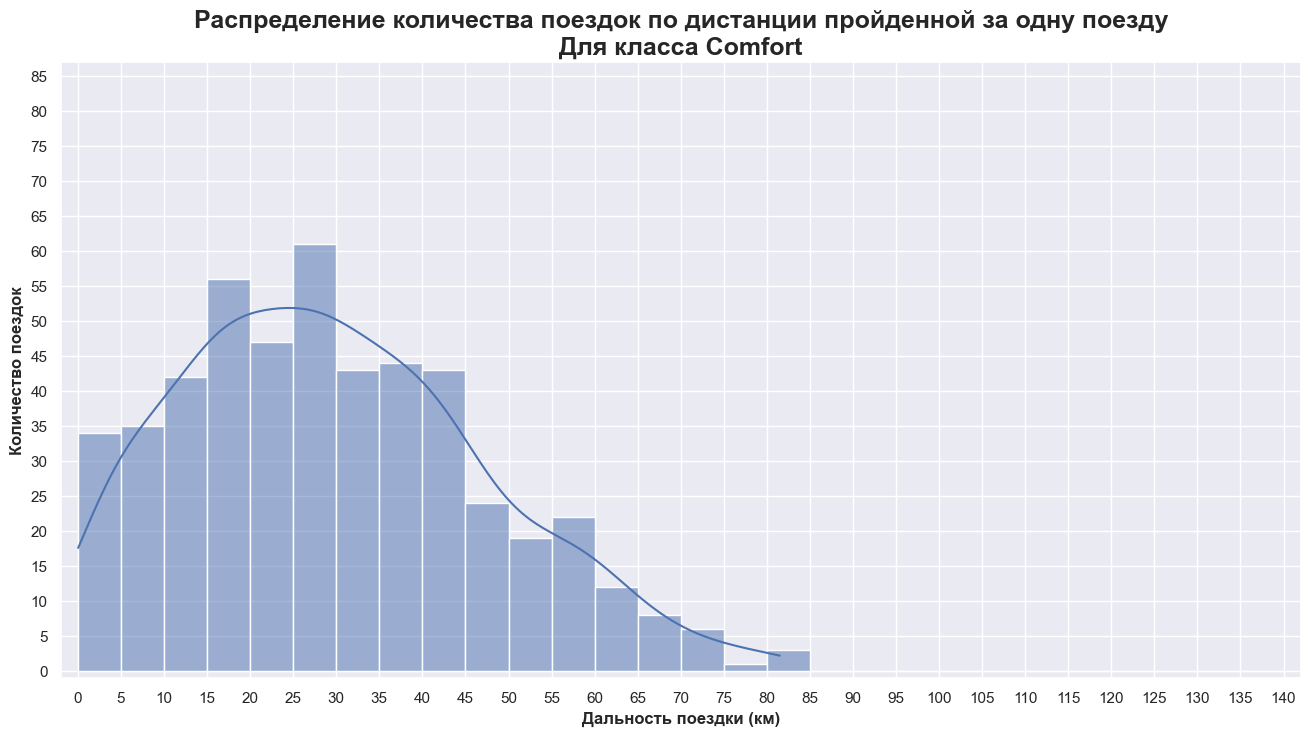

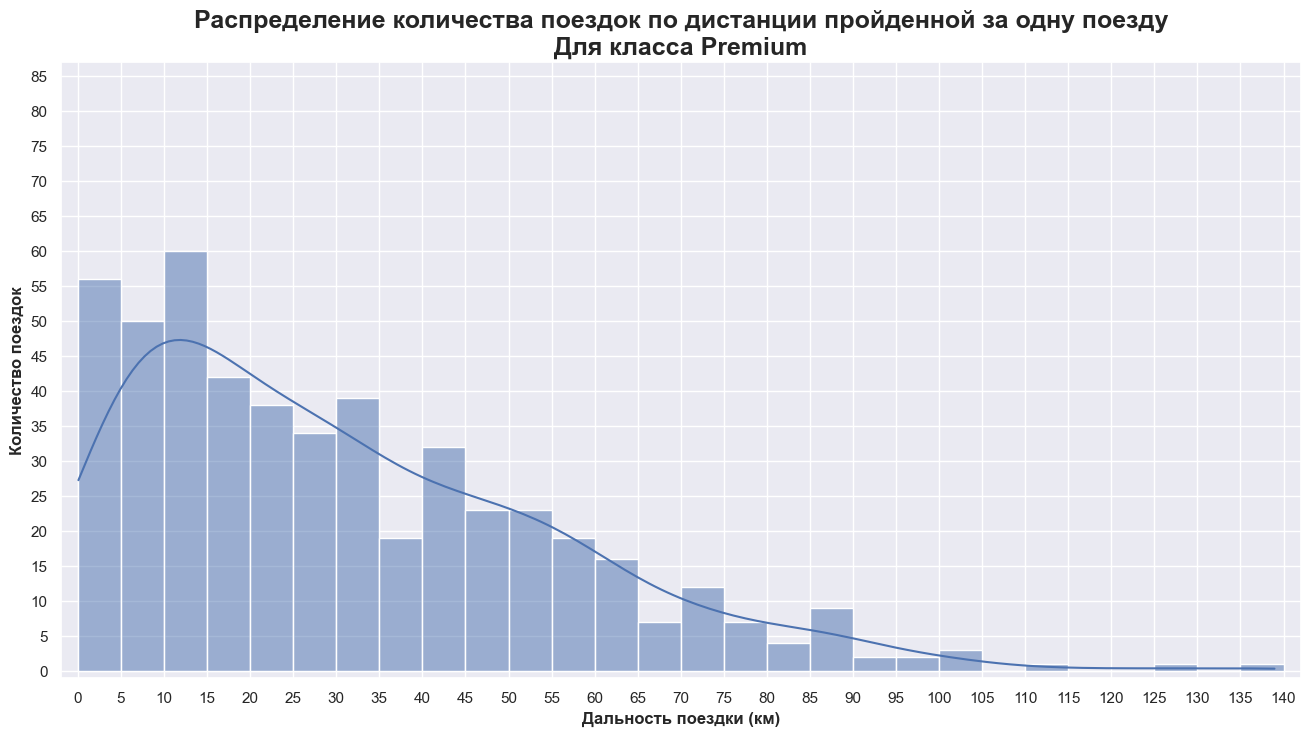

In [15]:
for a in tqdm(['Delivery', 'Economy', 'Comfort', 'Premium']):

    plt.figure(figsize=[16, 8])
    plt.title(f'Распределение количества поездок по дистанции пройденной за одну поезду\nДля класса {a}', 
              fontsize = 18, fontweight = 'bold')
    plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
    plt.ylabel('Количество поездок', fontweight = 'bold')
    sns.histplot(data = df[df['offer_class_group'] == a], x = 'distance_km', kde=True, binwidth = 5, binrange = [0, 140])
    plt.xlim(-2, 142)
    plt.ylim(-1, 87)
    plt.xticks(range(0, 141, 5))
    plt.yticks(range(0, 88, 5))
    plt.show()

---

Рассмотрев распределения по всем 4 классам, мы можем сделать вывод, что все графики имеют положительно смещенное распределение.

Причем смещение вправо у всех классов разное, самое максимальное смещение у класса Комфорт, а самое минимальное у Доставки.

Ниже рассмотрим графики «Свеча» для каждого класса по отдельности.

---

  0%|          | 0/4 [00:00<?, ?it/s]

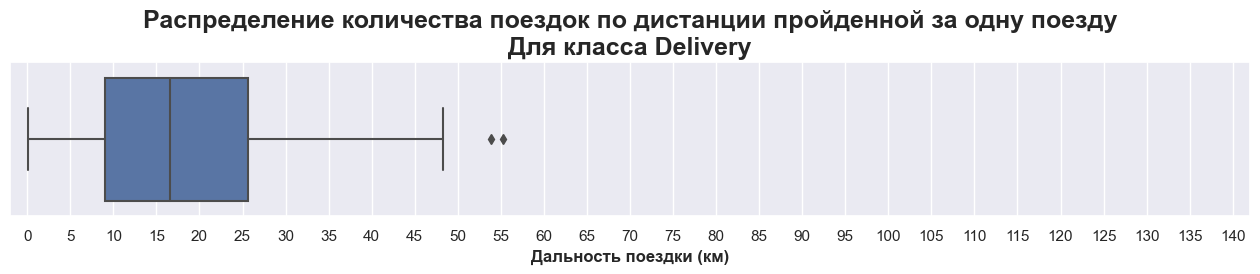

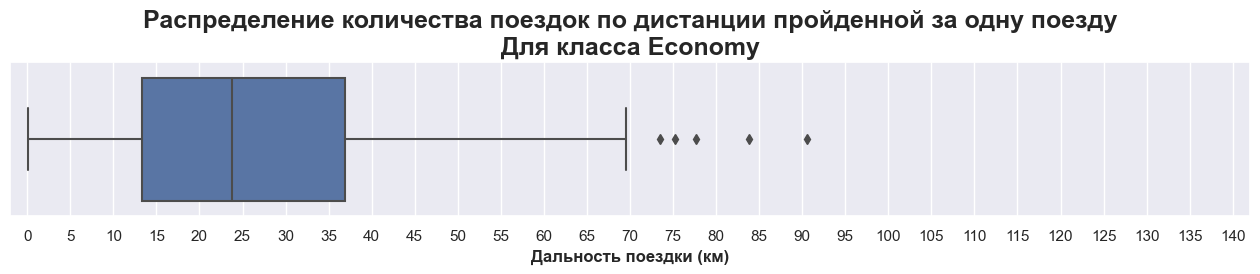

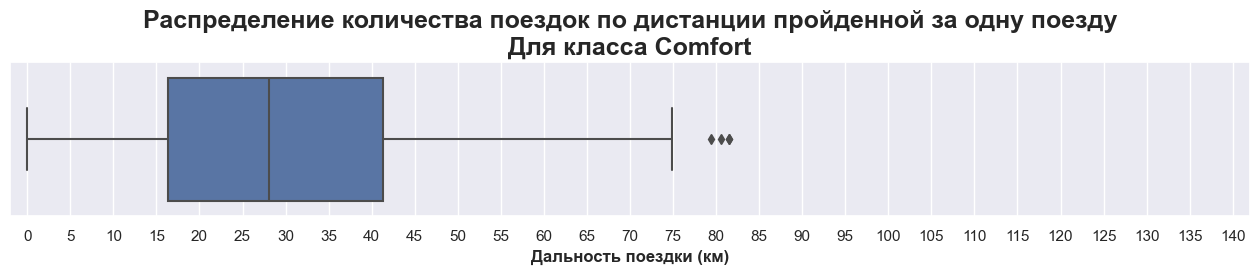

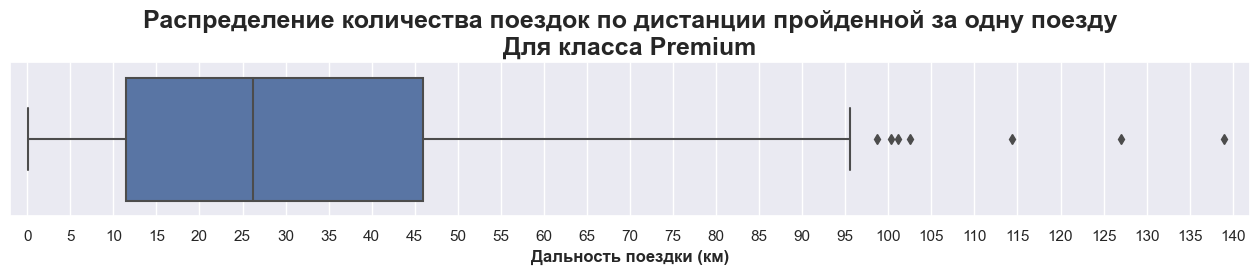

In [16]:
for a in tqdm(['Delivery', 'Economy', 'Comfort', 'Premium']):

    plt.figure(figsize=[16, 2])
    sns.boxplot(data = df[df['offer_class_group'] == a], x = 'distance_km')
    plt.title(f'Распределение количества поездок по дистанции пройденной за одну поезду\nДля класса {a}', 
              fontsize = 18, fontweight = 'bold')
    plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
    plt.xlim(-2, 142)
    plt.xticks(range(0, 141, 5))
    plt.show()

---

Из построенных графиков выше мы видим, что Доставку заказывают в основном для более коротких расстояний, а класс Премиум охватывает в полном объеме все дистанции поездок и также его предпочитают для самых длинных заказов.

Классы Эконом и Комфорт более схожи между собой, более подробно по ним посмотрим ниже.

---

# 6. Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов (примечание: поможет функция seaborn.distplot или seaborn.kdeplot)

In [17]:
df1 = df[(df['offer_class_group'] == 'Economy') | (df['offer_class_group'] == 'Comfort')]
df1

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,19,2.142,Comfort,1
11,3845,3,7,83.830,Economy,0
13,4957,3,22,14.239,Economy,1
14,5150,5,3,4.334,Economy,0
15,6635,7,10,10.889,Comfort,1
...,...,...,...,...,...,...
1993,917931,6,20,32.839,Comfort,0
1994,917962,1,1,42.714,Economy,0
1996,918656,7,14,30.835,Comfort,1
1998,918737,2,23,14.960,Economy,0


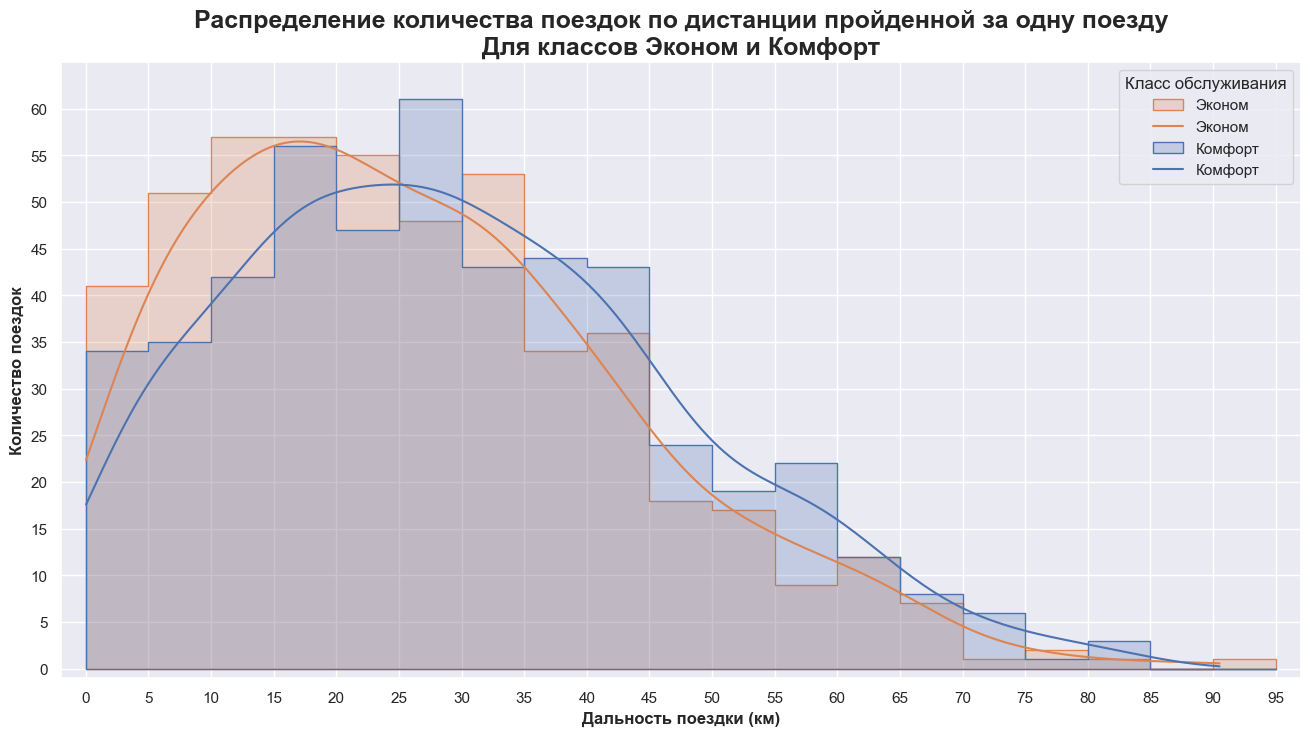

In [18]:
plt.figure(figsize=[16, 8])
sns.histplot(data = df1, x = 'distance_km', kde=True, binwidth = 5, 
             hue = 'offer_class_group', element="step", binrange = [0, 95])
plt.title('Распределение количества поездок по дистанции пройденной за одну поезду\nДля классов Эконом и Комфорт', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
plt.ylabel('Количество поездок', fontweight = 'bold')
plt.legend(title='Класс обслуживания', labels=['Эконом', 'Эконом', 'Комфорт', 'Комфорт'])
plt.xlim(-2, 97)
plt.ylim(-1, 65)
plt.xticks(range(0, 96, 5))
plt.yticks(range(0, 61, 5))
plt.show()

---

Из распределения для классов Эконом и Комфорт мы видим, что на поездки свыше 25 - 35 км люди больше предпочитают Комфорт класс.

Теперь более детально посмотрим на данные без выбросов и только состоявшиеся поездки.
За выбросы будем считать поездки короче 750 м более 75 км.

---

In [19]:
df2 = df[((df['offer_class_group'] == 'Economy') | (df['offer_class_group'] == 'Comfort')) &
        (df['driver_response'] == 1) & (df['distance_km'] < 75) & (df['distance_km'] > 0.75)]

df2

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
6,2710,4,19,2.142,Comfort,1
13,4957,3,22,14.239,Economy,1
15,6635,7,10,10.889,Comfort,1
16,7277,4,12,28.825,Comfort,1
20,8758,4,17,26.413,Economy,1
...,...,...,...,...,...,...
1976,910601,3,16,3.506,Economy,1
1980,912702,2,19,26.432,Economy,1
1981,913851,7,13,8.293,Economy,1
1989,916421,5,5,13.005,Comfort,1


In [20]:
df1.groupby('offer_class_group').agg({'distance_km': ['describe']}).reset_index().round(2)

offer_class_group distance_km                                           \
                       describe                                            
                          count   mean    std   min    25%    50%    75%   
0           Comfort       500.0  29.76  17.64  0.02  16.35  28.08  41.30   
1           Economy       500.0  26.28  17.02  0.09  13.37  23.80  36.85   

          
          
     max  
0  81.51  
1  90.52

In [21]:
df2.groupby('offer_class_group').agg({'distance_km': ['describe']}).reset_index().round(2)

offer_class_group distance_km                                           \
                       describe                                            
                          count   mean    std   min    25%    50%    75%   
0           Comfort       238.0  29.87  17.12  1.00  16.51  28.75  42.35   
1           Economy       207.0  25.82  15.54  1.14  13.10  23.55  36.29   

          
          
     max  
0  74.82  
1  66.62

In [22]:
c1 = len(df1[df1['offer_class_group'] == 'Comfort'])
c2 = len(df2[df2['offer_class_group'] == 'Comfort'])
e1 = len(df1[df1['offer_class_group'] == 'Economy'])
e2 = len(df2[df2['offer_class_group'] == 'Economy'])

print(' По классу Comfort было:', c1, 'стало:', c2, '(', round(c2*100/c1, 2), '% )', 'было удалено:', c1-c2, '(', round((c1-c2)*100/c1, 2), '% )\n',
       'По классу Economy было:', e1, 'стало:', e2, '(', round(e2*100/e1, 2), '% )', 'было удалено:', e1-e2, '(', round((e1-e2)*100/e1, 2), '% )')

 По классу Comfort было: 500 стало: 238 ( 47.6 % ) было удалено: 262 ( 52.4 % )
 По классу Economy было: 500 стало: 207 ( 41.4 % ) было удалено: 293 ( 58.6 % )


---

Как мы видим после чистки данных ушло более 50 %

Так же можно сделать вывод, что от поездки в классе Эконом отказываются чаще чем от поездок в классе Комфорт.

---

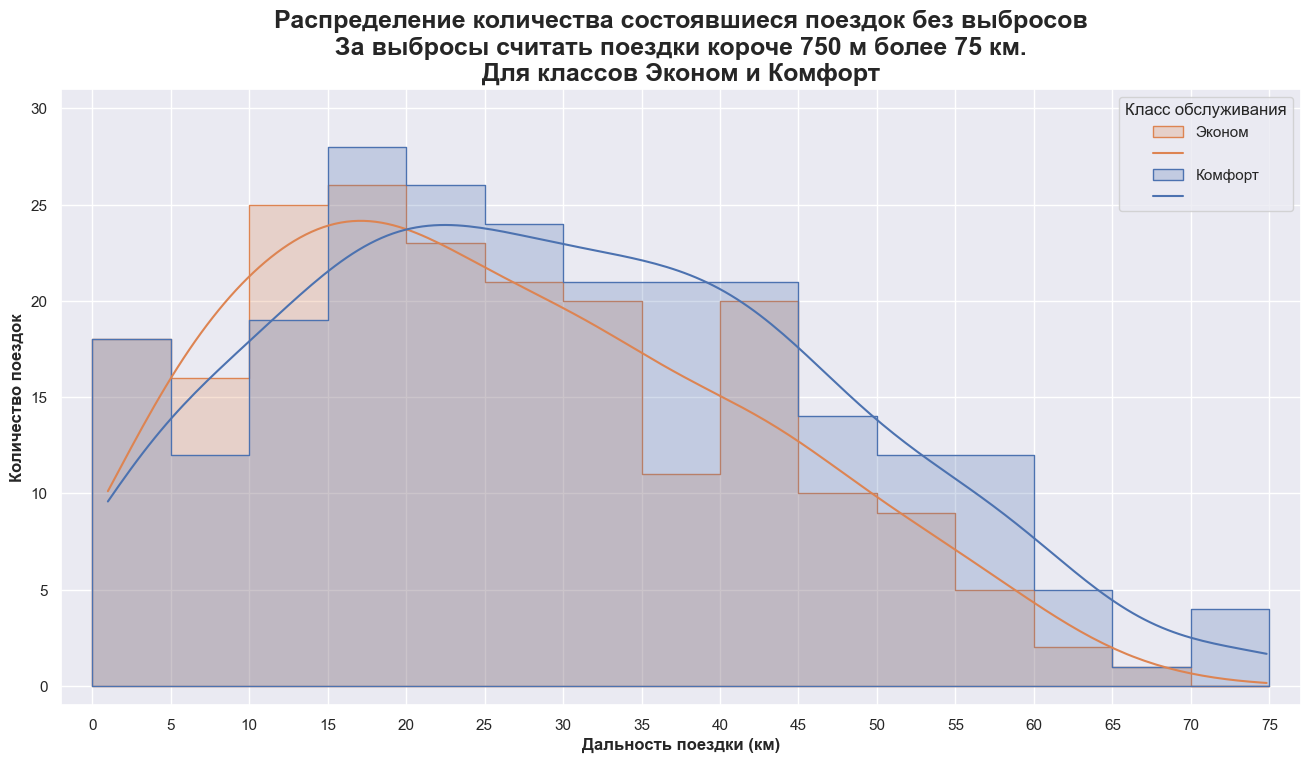

In [44]:
plt.figure(figsize=[16, 8])
sns.histplot(data = df2, x = 'distance_km', kde=True, binwidth = 5, 
             hue = 'offer_class_group', element="step", binrange = [0, 75])
plt.title('Распределение количества состоявшиеся поездок без выбросов\nЗа выбросы считать поездки короче 750 м более 75 км.\nДля классов Эконом и Комфорт', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
plt.ylabel('Количество поездок', fontweight = 'bold')
plt.legend(title='Класс обслуживания', labels=['Эконом', '', 'Комфорт', ''])
plt.xlim(-2, 77)
plt.ylim(-1, 31)
plt.xticks(range(0, 76, 5))
plt.yticks(range(0, 31, 5))
plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

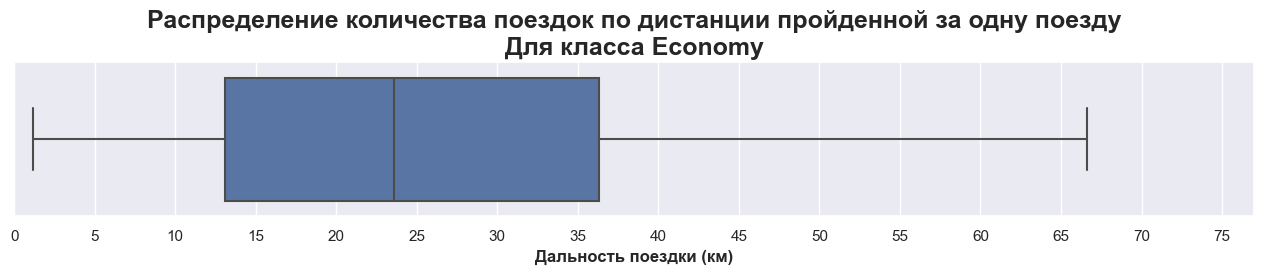

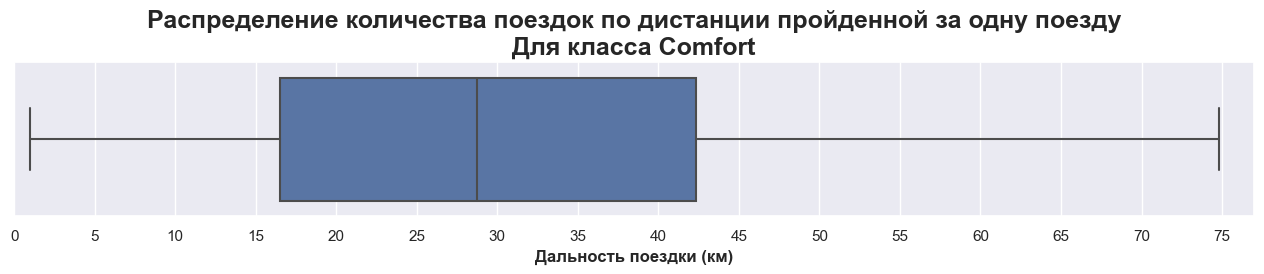

In [24]:
for a in tqdm(['Economy', 'Comfort']):

    plt.figure(figsize=[16, 2])
    sns.boxplot(data = df2[df2['offer_class_group'] == a], x = 'distance_km')
    plt.title(f'Распределение количества поездок по дистанции пройденной за одну поезду\nДля класса {a}', 
              fontsize = 18, fontweight = 'bold')
    plt.xlabel('Дальность поездки (км)', fontweight = 'bold')
    plt.xlim(0, 77)
    plt.xticks(range(0, 77, 5))
    plt.show()

---

Теперь после чистки данных, мы явно видим, что на поездки свыше 15 - 20 км люди больше предпочитают Комфорт класс.

Так же более детально посмотрим на распределение поездок по часам и дням недели.

---

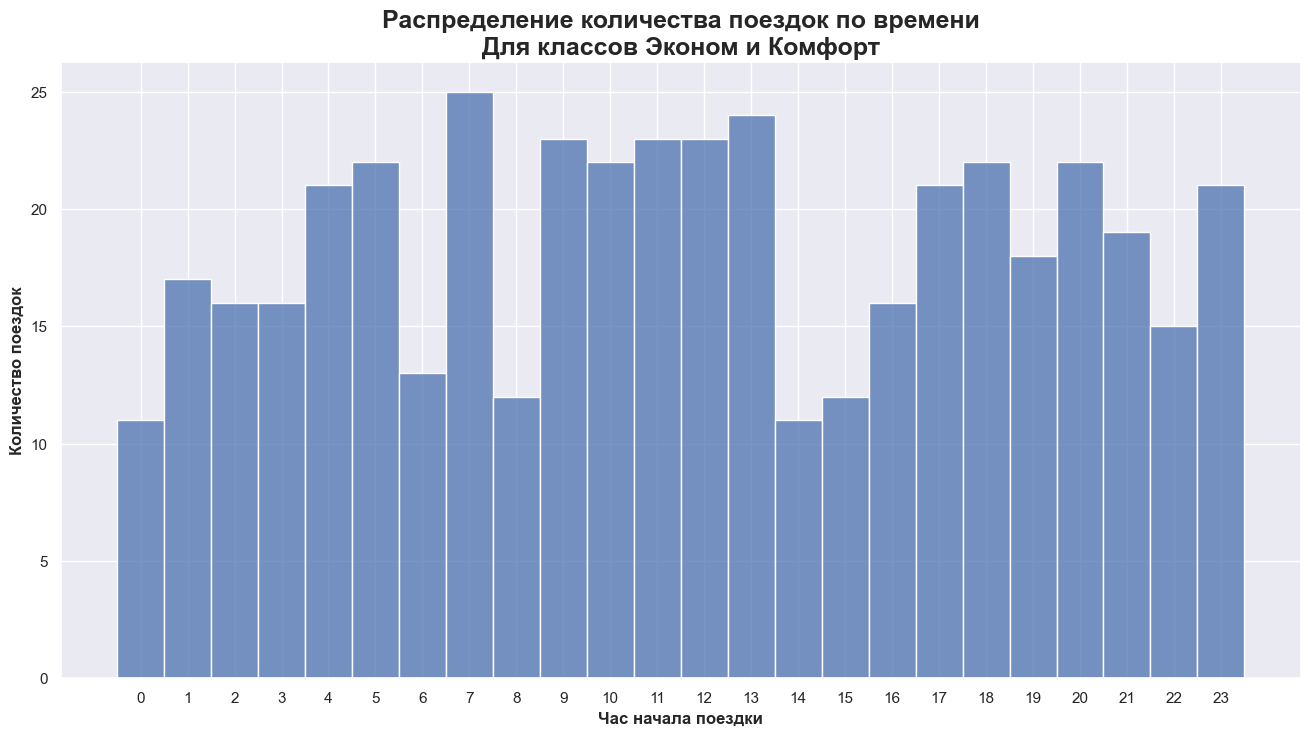

In [25]:
plt.figure(figsize=[16, 8])
sns.histplot(data = df2[['hour_key']].sort_values(by=['hour_key']).astype(str), x = 'hour_key');
plt.title('Распределение количества поездок по времени\nДля классов Эконом и Комфорт', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Час начала поездки', fontweight = 'bold')
plt.ylabel('Количество поездок', fontweight = 'bold')
plt.show()

---

Как видно из графика распределения, особых часов, где наблюдается повышенный спрос на такси нет. Есть только несколько часов, где спрос падает, это полночь, 6 и 8 утра, а также наблюдается спад после обеда с 14 до 16 часов.

---

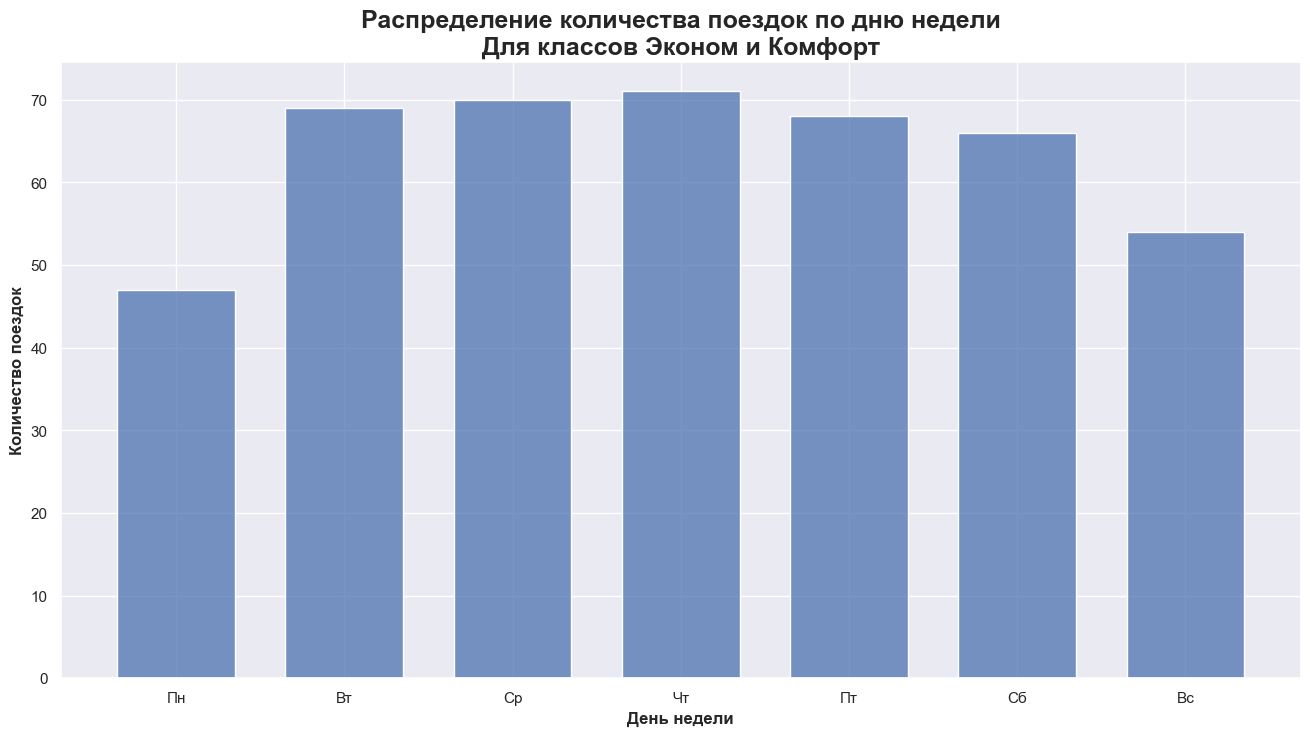

In [26]:
plt.figure(figsize=[16, 8])
sns.histplot(data = df2[['weekday_key']].sort_values(by=['weekday_key']).astype(str), 
             x = 'weekday_key', shrink = 0.7);
plt.title('Распределение количества поездок по дню недели\nДля классов Эконом и Комфорт', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('День недели', fontweight = 'bold')
plt.ylabel('Количество поездок', fontweight = 'bold')
plt.xticks(['1', '2', '3', '4', '5', '6', '7'], ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

---

Из распределения по дням недели мы видим, что спрос на такси в основном падает в понедельник, так же не большое падение мы можем видеть в воскресение.

---

In [27]:
df3 = df2.sort_values(by=['hour_key']).copy()
df3['hour_key'] = df3['hour_key'].astype(str)

df3.head(3)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
302,130979,6,0,23.570,Comfort,1
1377,644328,7,0,45.711,Comfort,1
427,190265,2,0,10.410,Comfort,1


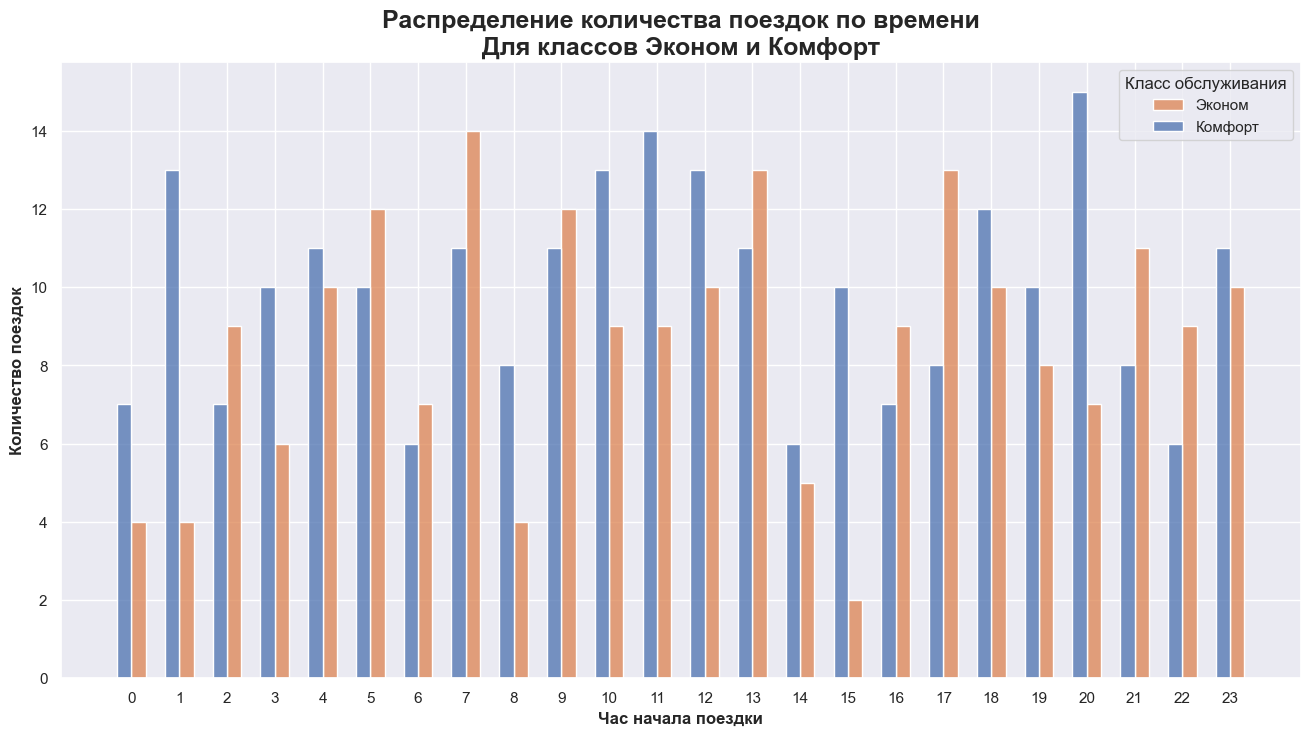

In [28]:
plt.figure(figsize=[16, 8])
sns.histplot(data = df3, x = 'hour_key', hue = 'offer_class_group', multiple="dodge", shrink = 0.6)
plt.title('Распределение количества поездок по времени\nДля классов Эконом и Комфорт', fontsize = 18, fontweight = 'bold')
plt.xlabel('Час начала поездки', fontweight = 'bold')
plt.ylabel('Количество поездок', fontweight = 'bold')
plt.legend(title='Класс обслуживания', labels=['Эконом', 'Комфорт'])
plt.show()

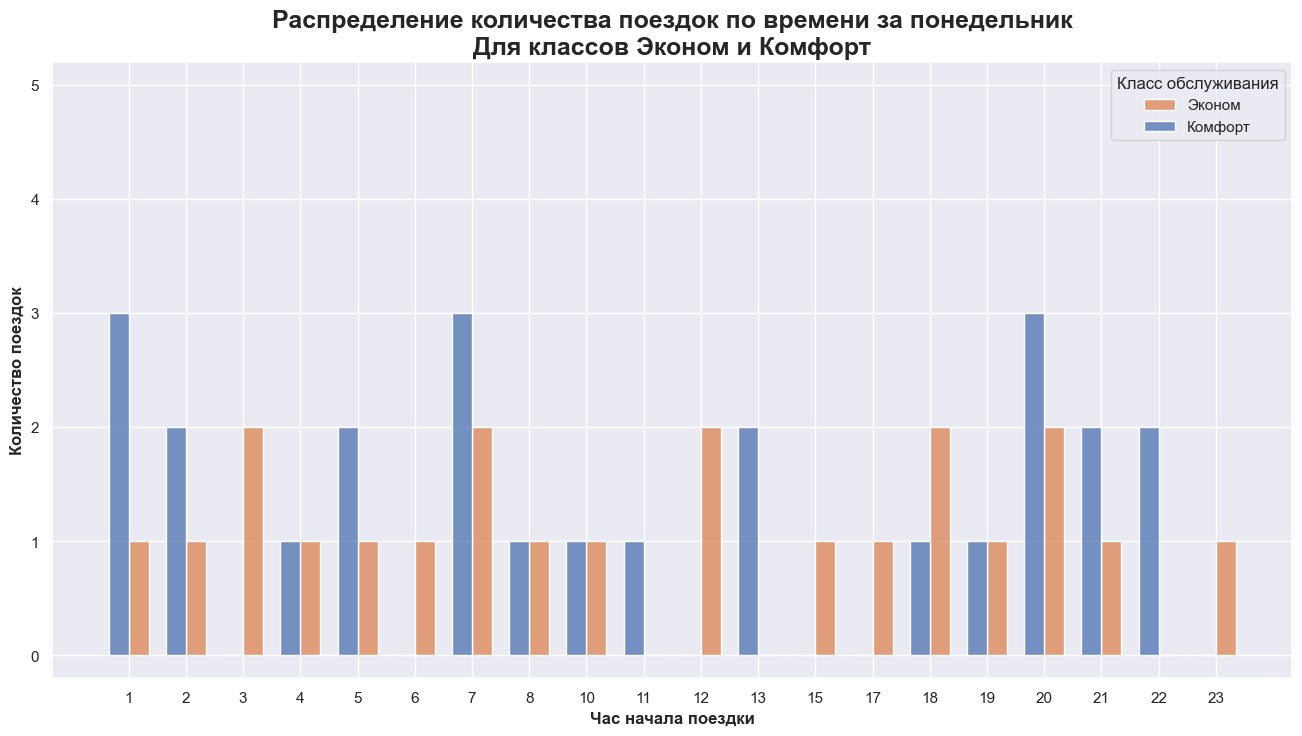

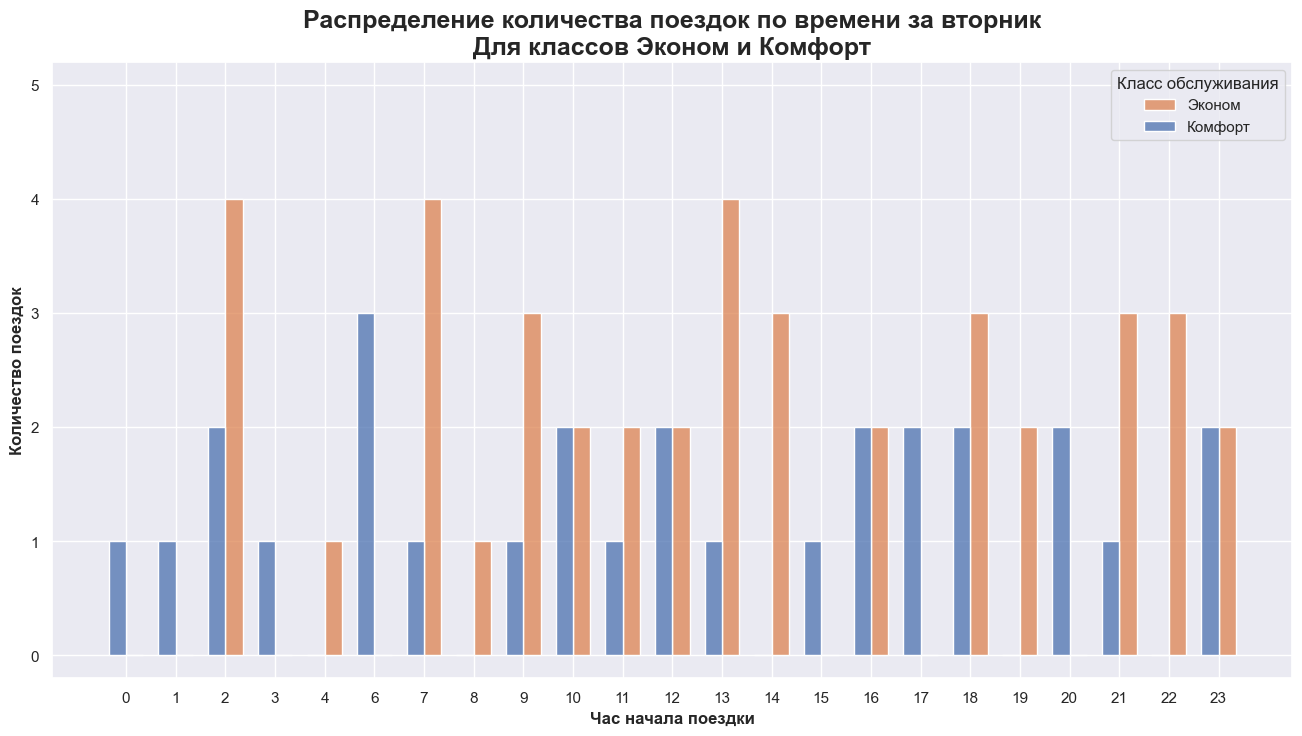

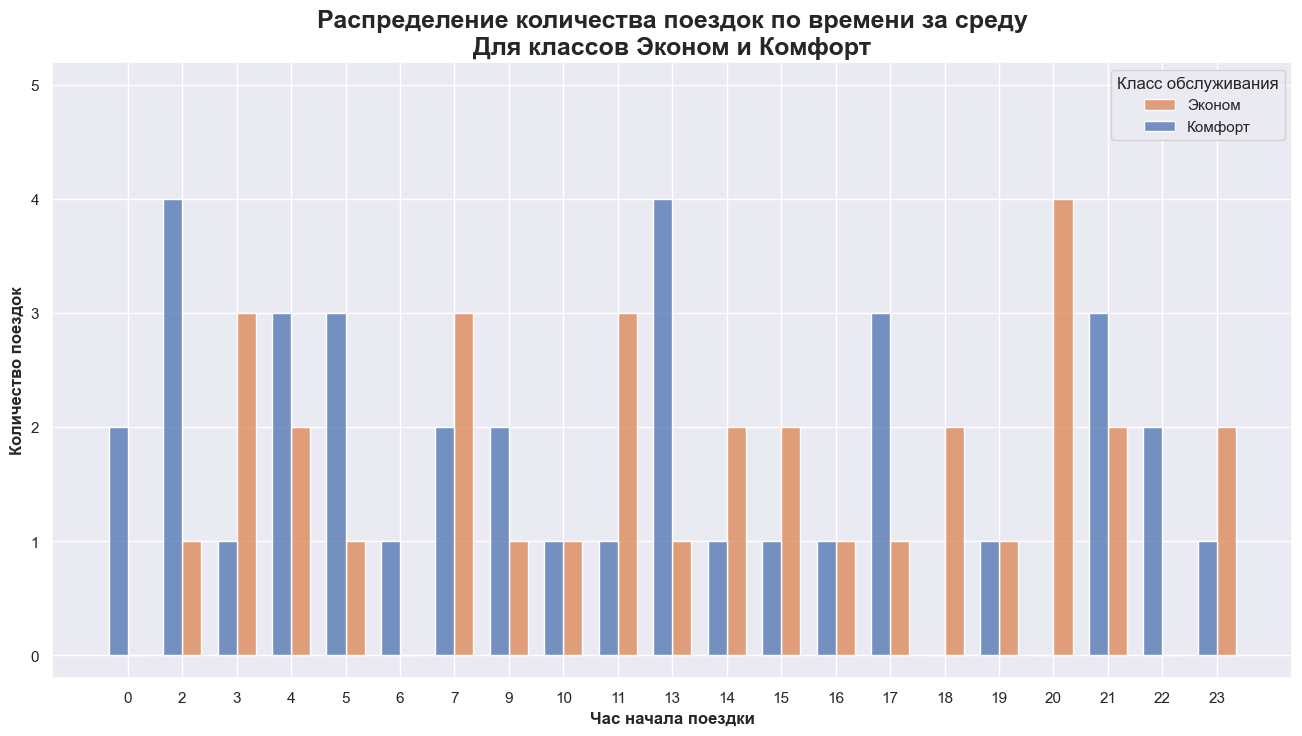

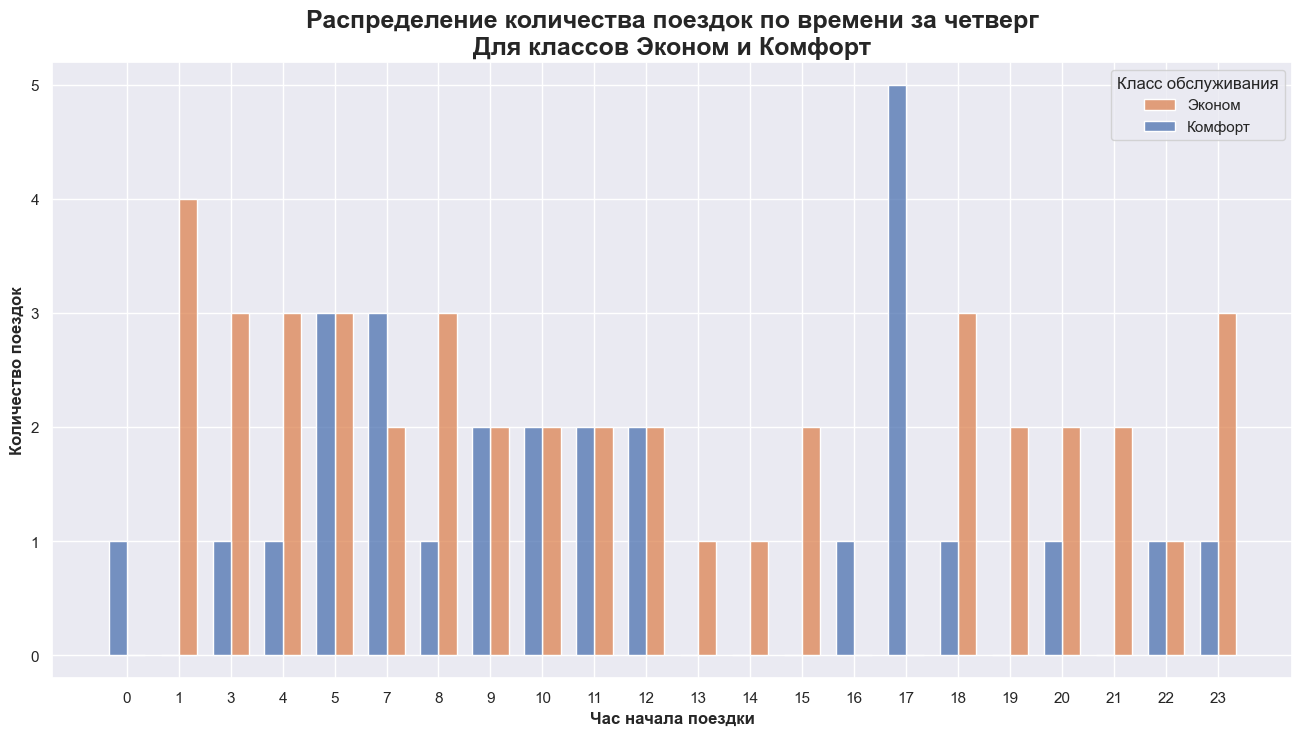

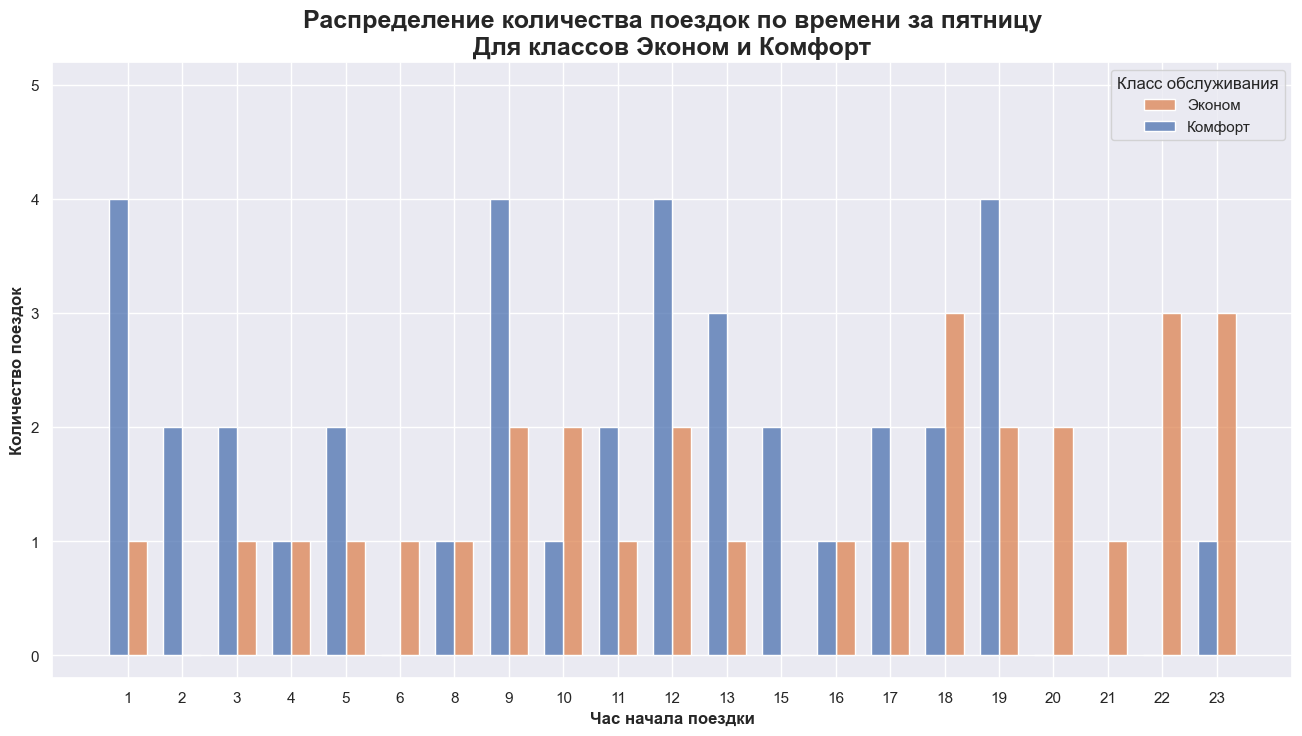

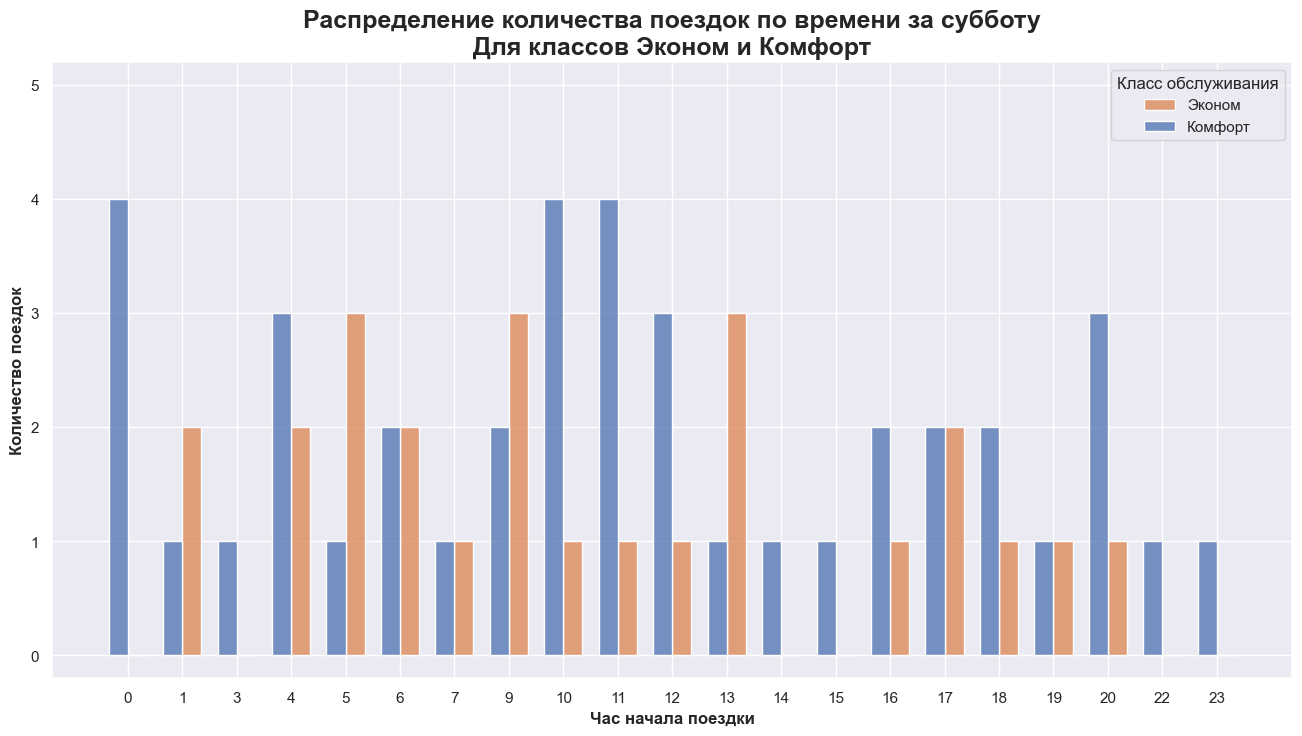

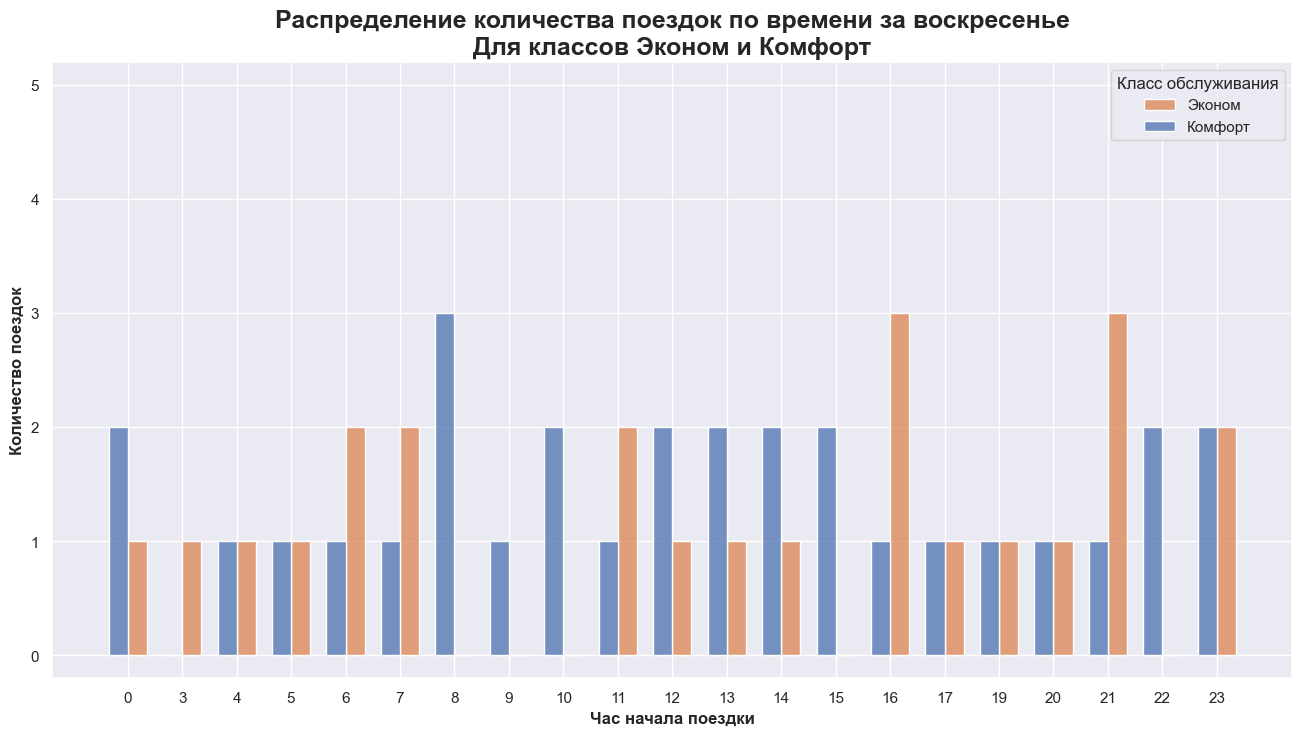

In [29]:
for a, b in zip(range(1, 8), ['понедельник', 'вторник', 'среду', 'четверг', 'пятницу', 'субботу', 'воскресенье']):
    plt.figure(figsize=[16, 8])
    sns.histplot(data = df3[df3['weekday_key'] == a], x = 'hour_key', 
                 hue = 'offer_class_group', multiple="dodge", shrink=.7)
    plt.title(f'Распределение количества поездок по времени за {b}\nДля классов Эконом и Комфорт', 
              fontsize = 18, fontweight = 'bold')
    plt.xlabel('Час начала поездки', fontweight = 'bold')
    plt.ylabel('Количество поездок', fontweight = 'bold')
    plt.yticks(range(0, 6))
    plt.ylim(-0.2, 5.2)
    plt.legend(title='Класс обслуживания', labels=['Эконом', 'Комфорт'])
    plt.show()

---

После более детального рассмотрения распределения поездок по часам и дням недели, мы видим, что в среднем совершается по 2 – 3 поездки в час в каждом классе.

Единственный пик поездок был в четверг в 17 у класса комфорт – 5 поездок.

Из представленных выше графиков распределения, можно сделать следующий вывод: 

### Из представленных данных нет возможности для определения наибольшей загруженности в такси по часам, т.к. в час в основном совершается пару поездок.

---

# 7. Проведите стат. тест (поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса 
## (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [30]:
a1 = df1[df1['offer_class_group'] == 'Economy']['distance_km']
a1

11      83.830
13      14.239
14       4.334
20      26.413
21      21.296
         ...  
1984    13.201
1986    20.151
1994    42.714
1998    14.960
1999    68.559
Name: distance_km, Length: 500, dtype: float64

In [31]:
b1 = df1[df1['offer_class_group'] == 'Comfort']['distance_km']
b1

6        2.142
15      10.889
16      28.825
17      17.281
23       4.126
         ...  
1979    33.284
1988    56.873
1989    13.005
1993    32.839
1996    30.835
Name: distance_km, Length: 500, dtype: float64

In [32]:
a2 = df2[df2['offer_class_group'] == 'Economy']['distance_km']
a2

13      14.239
20      26.413
21      21.296
50      14.651
54       1.781
         ...  
1950    20.117
1964    14.164
1976     3.506
1980    26.432
1981     8.293
Name: distance_km, Length: 207, dtype: float64

In [33]:
b2 = df2[df2['offer_class_group'] == 'Comfort']['distance_km']
b2

6        2.142
15      10.889
16      28.825
25      39.518
28       8.467
         ...  
1967     4.129
1971    14.288
1974    31.729
1989    13.005
1996    30.835
Name: distance_km, Length: 238, dtype: float64

In [34]:
stats.ttest_ind(a1, b1, equal_var=True, alternative='two-sided')

TtestResult(statistic=-3.1706426042389815, pvalue=0.0015673809987275479, df=998.0)

In [35]:
stats.ttest_ind(a2, b2, equal_var=True, alternative='two-sided')

TtestResult(statistic=-2.595093921227356, pvalue=0.009770289206069396, df=443.0)

In [36]:
stats.ttest_ind(a1, b1, equal_var=True, alternative='less')

TtestResult(statistic=-3.1706426042389815, pvalue=0.0007836904993637739, df=998.0)

In [37]:
stats.ttest_ind(a2, b2, equal_var=True, alternative='less')

TtestResult(statistic=-2.595093921227356, pvalue=0.004885144603034698, df=443.0)

In [38]:
stats.ttest_ind(a1, b1, equal_var=True, alternative='greater')

TtestResult(statistic=-3.1706426042389815, pvalue=0.9992163095006362, df=998.0)

In [39]:
stats.ttest_ind(a2, b2, equal_var=True, alternative='greater')

TtestResult(statistic=-2.595093921227356, pvalue=0.9951148553969653, df=443.0)

# 8. Сделайте выводы по результатам проведения стат. теста

Проведя стат. тесты для наших выборок:
* a1 – эконом класс, все 500 значений;
* b1 – комфорт класс, все 500 значений;
* a2 – эконом класс, без выбросов и только состоявшиеся поездки, 207 значений;
* b2 – комфорт класс, без выбросов и только состоявшиеся поездки, 238 значений.

Мы рассматривали следующие гипотезы:

H 0 : a = b (две средние совокупности равны)

H 1 : a ≠ b (две средние совокупности не равны)

По результатам тестов мы получили следующие p-значения (0.0015673809987275479 и 0.009770289206069396) – это меньше, чем альфа = 0,05. 
Мы отвергаем нулевую гипотезу теста. Выборки отличаются - средняя дистанция, пройденная за одну поезду между двумя классами различна.

Мы также провели тесты с различными параметрами «alternative». 
По их результатам, мы можем с уверенностью подтвердить ранее сделанный вывод, о том, что на более длинные поездки предпочитают класс Комфорт.

# 9. Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)

In [40]:
df1.groupby('offer_class_group').agg({'distance_km': ['describe']}).reset_index().round(2)

offer_class_group distance_km                                           \
                       describe                                            
                          count   mean    std   min    25%    50%    75%   
0           Comfort       500.0  29.76  17.64  0.02  16.35  28.08  41.30   
1           Economy       500.0  26.28  17.02  0.09  13.37  23.80  36.85   

          
          
     max  
0  81.51  
1  90.52

In [41]:
df2.groupby('offer_class_group').agg({'distance_km': ['describe']}).reset_index().round(2)

offer_class_group distance_km                                           \
                       describe                                            
                          count   mean    std   min    25%    50%    75%   
0           Comfort       238.0  29.87  17.12  1.00  16.51  28.75  42.35   
1           Economy       207.0  25.82  15.54  1.14  13.10  23.55  36.29   

          
          
     max  
0  74.82  
1  66.62

---

По их результатам, мы можем с уверенностью подтвердить ранее сделанный вывод, о том, что на более длинные поездки предпочитают класс Комфорт.

---

# 10. Оформите презентацию для демонстрации результатов стейкхолдерам

Презентация в файле TAXI.pdf